#**Performing regression using KNN and SVR on Toyota dataset**

#Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_csv('D:/Chools/Day_13/Toyoto_Corrola.csv')

#Preprocessing

In [3]:
# Check for missingness
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Id           0
Model        0
Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


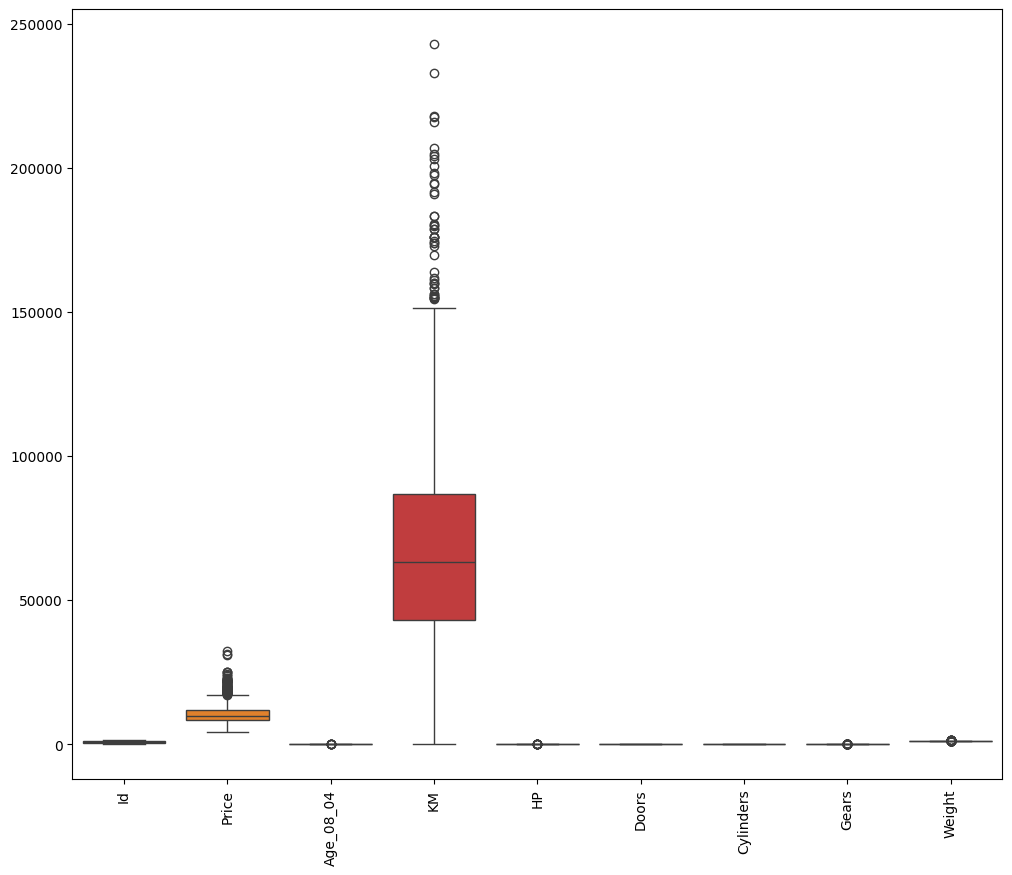

In [4]:
# Check for outliers
plt.figure(figsize=(12, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [5]:
# Check for typo errors and find unique values for car model
print("Unique Car Models:", df['Model'].unique())

Unique Car Models: ['TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors'
 'ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors'
 'TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors'
 'ÊTOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors'
 'TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors'
 'ÊTOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors'
 'ÊTOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors'
 'TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors'
 'TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2/3-Doors'
 'TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-Doors'
 'ÊTOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-Doors'
 'ÊTOYOTA Corolla 1.6 VVTI Linea Terra Comfort 2/3-Doors'
 'TOYOTA Corolla 1.6 16v L.SOL 2/3-Doors'
 'TOYOTA Corolla 1.6 16V VVT I 3DR TERRA 2/3-Doors'
 'ÊTOYOTA Corolla 1.6 16V VVT I 3DR TERRA 2/3-Doors'
 'TOYOTA Corolla 1.6 16V VVT I 3DR SOL AUT4 2/3-Doors'
 'TOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-Doors'
 'ÊTOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-Doors'
 'ÊTOYOTA Corolla 1.4 VVTI Linea Terra 2/3-Doors'
 'TOYOTA 

#Feature Selection

In [6]:
# Feature selection and importance using Random Forest
X = df.drop(['Id', 'Model', 'Price'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Feature selection using randomforest regressor

In [8]:
rf = RandomForestRegressor(n_estimators=120, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=120, random_state=42)

#Feature Importance

In [9]:
feature_importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
print("Feature Importance:\n", feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importance:
      Feature  Importance
0  Age_08_04    0.841171
6     Weight    0.068179
1         KM    0.066293
2         HP    0.018042
3      Doors    0.005497
5      Gears    0.000818
4  Cylinders    0.000000


"Age_08_04" feature is the most important for predicting the target variable (presumably "Price"), with an importance score of approximately 0.841. This indicates that the age of the Toyota Corolla (in months) at the time of sale is the most significant factor in determining its price of the model.


The other features have much lower importance scores, indicating their relative impact on the target variable is lower compared to "Age_08_04":

"Weight" has an importance score of about 0.068, suggesting it has some influence on the price prediction, but less than "Age_08_04".

"KM" (kilometers driven) and "HP" (horsepower) have importance scores of approximately 0.066 and 0.018, respectively, indicating they also contribute to the prediction, but to a lesser extent than "Weight" and "Age_08_04".

"Doors", "Gears", and "Cylinders" have very low or zero importance scores, suggesting they have minimal impact on the price prediction

In [10]:
# Feature selection
model = SelectFromModel(rf, prefit=True)
X_train_selected = model.transform(X_train_scaled)
X_test_selected = model.transform(X_test_scaled)

In [11]:
# Build SVM model
svm = SVR()
svm.fit(X_train_selected, y_train)
svm_score = svm.score(X_test_selected, y_test)
print("SVM Score:", svm_score)

# Build KNN model
knn = KNeighborsRegressor()
knn.fit(X_train_selected, y_train)
knn_score = knn.score(X_test_selected, y_test)
print("KNN Score:", knn_score)

SVM Score: 0.03287137433191134
KNN Score: 0.8190538854022031


In [12]:
# SVM model
svm_model = SVR()
svm_params = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(svm_model, svm_params, scoring='neg_mean_squared_error', cv=5)
svm_grid.fit(X_train_scaled, y_train)
svm_best_model = svm_grid.best_estimator_

In [13]:
# KNN model
knn_model = KNeighborsRegressor()
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(knn_model, knn_params, scoring='neg_mean_squared_error', cv=5)
knn_grid.fit(X_train_scaled, y_train)
knn_best_model = knn_grid.best_estimator_

In [14]:
# Evaluating the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

In [15]:
svm_mae, svm_mse, svm_r2 = evaluate_model(svm_best_model, X_test_scaled, y_test)
knn_mae, knn_mse, knn_r2 = evaluate_model(knn_best_model, X_test_scaled, y_test)

# Calculating accuracy scores
svm_train_accuracy = svm_best_model.score(X_train_scaled, y_train)
svm_test_accuracy = svm_best_model.score(X_test_scaled, y_test)

knn_train_accuracy = knn_best_model.score(X_train_scaled, y_train)
knn_test_accuracy = knn_best_model.score(X_test_scaled, y_test)

print("SVM Train Accuracy:", svm_train_accuracy)
print("SVM Test Accuracy:", svm_test_accuracy)

print("\nKNN Train Accuracy:", knn_train_accuracy)
print("KNN Test Accuracy:", knn_test_accuracy)

SVM Train Accuracy: 0.8469872577189992
SVM Test Accuracy: 0.8331525167989715

KNN Train Accuracy: 1.0
KNN Test Accuracy: 0.8773109428757436


In [16]:
print("SVM:")
print("MAE:", svm_mae)
print("MSE:", svm_mse)
print("R-squared:", svm_r2)

print("\nKNN:")
print("MAE:", knn_mae)
print("MSE:", knn_mse)
print("R-squared:", knn_r2)

# Selecting the best model
best_model = svm_best_model if svm_r2 > knn_r2 else knn_best_model

SVM:
MAE: 1011.6843053019937
MSE: 2226210.7374544013
R-squared: 0.8331525167989715

KNN:
MAE: 880.054212189236
MSE: 1637014.182641818
R-squared: 0.8773109428757436


In [17]:
from tabulate import tabulate

table = [
    ["Model", "Train Accuracy", "Test Accuracy", "MAE", "MSE", "R-squared"],
    ["SVM", svm_train_accuracy, svm_test_accuracy, svm_mae, svm_mse, svm_r2],
    ["KNN", knn_train_accuracy, knn_test_accuracy, knn_mae, knn_mse, knn_r2]
]

print(tabulate(table, headers="firstrow", floatfmt=".4f"))

Model      Train Accuracy    Test Accuracy        MAE           MSE    R-squared
-------  ----------------  ---------------  ---------  ------------  -----------
SVM                0.8470           0.8332  1011.6843  2226210.7375       0.8332
KNN                1.0000           0.8773   880.0542  1637014.1826       0.8773


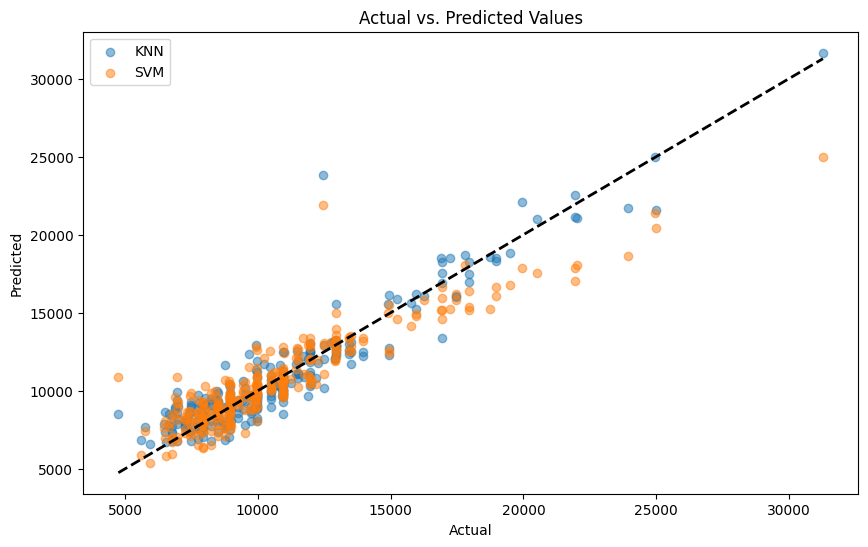

In [18]:
# Actual vs. Predicted Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_best_model.predict(X_test_scaled), label='KNN', alpha=0.5)
plt.scatter(y_test, svm_best_model.predict(X_test_scaled), label='SVM', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

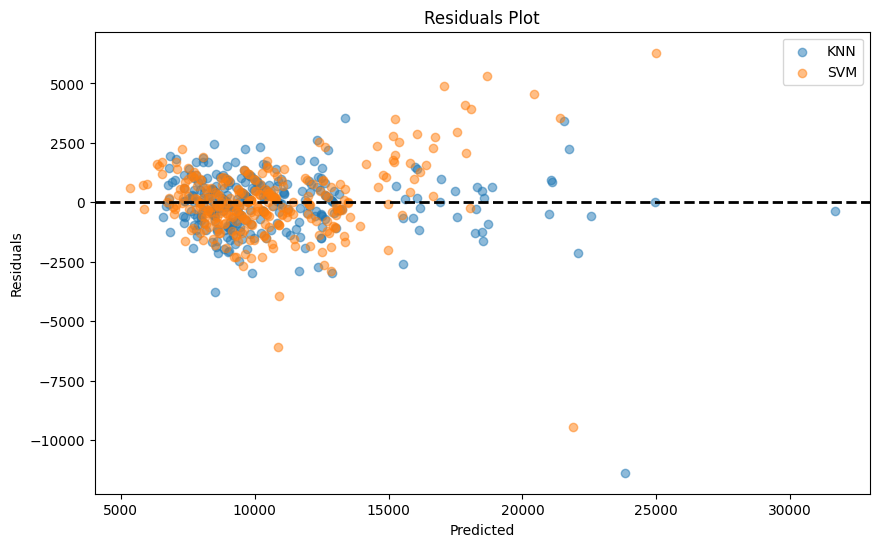

In [19]:
# Residuals Plot
plt.figure(figsize=(10, 6))
plt.scatter(knn_best_model.predict(X_test_scaled), y_test - knn_best_model.predict(X_test_scaled), label='KNN', alpha=0.5)
plt.scatter(svm_best_model.predict(X_test_scaled), y_test - svm_best_model.predict(X_test_scaled), label='SVM', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()



The results indicate that both models perform reasonably well in predicting car prices, but with some differences:

- **SVM** achieved a train accuracy of approximately 84.7% and a test accuracy of about 83.3%. It also yielded a mean absolute error (MAE) of around 1011.68, a mean squared error (MSE) of about 2,226,210.74, and an R-squared value of approximately 0.833.

- **KNN** achieved a train accuracy of 100% and a test accuracy of about 87.7%. It also yielded a lower MAE of approximately 880.05, a lower MSE of about 1,637,014.18, and a higher R-squared value of approximately 0.877.

Based on these results, it can be conclude that the KNN model out-performs the SVM model for this dataset. **The KNN model demonstrates higher accuracy on both training and test sets, as well as lower error metrics (MAE and MSE) and a higher R-squared value, indicating better overall performance in predicting Toyota Corolla prices. Therefore, we recommend using the KNN model for this dataset to achieve the best predictions.**